합격 후기
https://brunch.co.kr/@overmanwannabe/58

## 문제풀이 복원자 31회 시험 성적
- 머신러닝: 50.3점
- 통계분석: 25.5점
- 총합: 75.8점

# 31회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

In [1]:
import pandas as pd
medical=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv')
medical.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662


## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1262 non-null   object 
 1   Gender                          1262 non-null   object 
 2   Age                             1262 non-null   int64  
 3   Height                          1262 non-null   float64
 4   Weight                          1262 non-null   int64  
 5   family_history_with_overweight  1262 non-null   object 
 6   FAVC                            1262 non-null   object 
 7   FCVC                            1262 non-null   object 
 8   NCP                             1262 non-null   int64  
 9   CAEC                            1262 non-null   object 
 10  SMOKE                           1262 non-null   object 
 11  CH2O                            1262 non-null   object 
 12  SCC                             12

In [3]:
medical.shape

(1262, 20)

In [62]:
#결측치 확인
medical.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               3
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

SCC 변수의 결측치가 3개임을 확인하였다. 그러나 결측치가 포함된 행의 수가 적으므로 삭제하기로 한다 

In [2]:
medical_1=medical.dropna(axis=0)
medical_1.isna().sum()

Unnamed: 0                        0
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

@@저는 ADP 시험을 볼 때 plt.subplots을 사용해서 모든 데이터를 한 눈에 보기 편하게 시각화하는 것도 좋지만
<br>항상 컬럼 하나하나를 시각화해서 들여다봤었습니다(무엇이 더 좋은지는 알 수 없지만..)
<br>시각화를 하면서 페이지수가 길어지기는 하는데 그 다음 문제에서도 쓸 수 있는 인사이트를 얻을 수 있어서 이렇게 해왔습니다. 

In [26]:
#id 컬럼에서 중복값이 있는지 확인
medical['id'].value_counts().sort_values(ascending=False)

4        1
69       1
20       1
22       1
24       1
        ..
2,107    1
2,108    1
2,109    1
2,110    1
2,111    1
Name: id, Length: 1262, dtype: int64

In [59]:
col_num=medical.select_dtypes(exclude='object').columns
col_obj=medical.iloc[:,1:].select_dtypes(include='object').columns

count    1262.000000
mean       25.749604
std         9.898088
min        15.000000
25%        21.000000
50%        24.000000
75%        27.000000
max       150.000000
Name: Age, dtype: float64


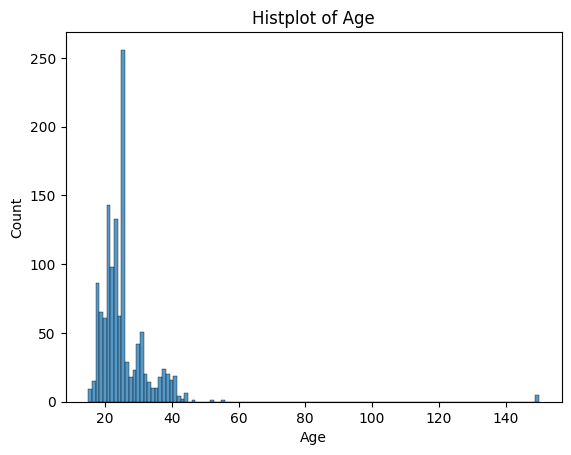



count    1262.000000
mean        1.709184
std         0.091361
min         1.450000
25%         1.631576
50%         1.711095
75%         1.775768
max         1.980000
Name: Height, dtype: float64


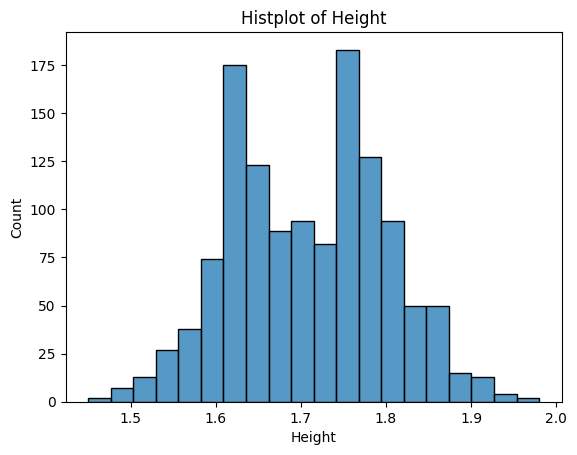



count    1262.000000
mean      101.083201
std        21.520848
min        53.000000
25%        82.000000
50%       105.000000
75%       116.000000
max       173.000000
Name: Weight, dtype: float64


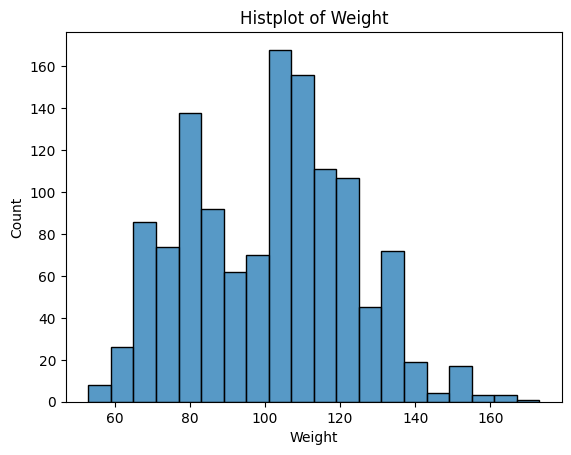



count    1262.000000
mean        2.665610
std         0.757143
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


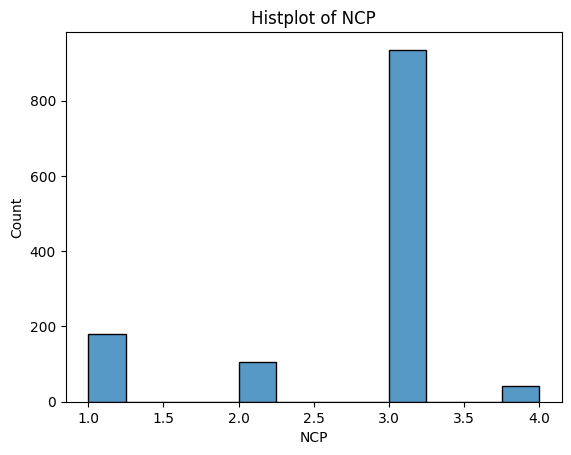



count    1262.000000
mean       34.439463
std         6.106623
min        22.826739
25%        30.725995
50%        34.332001
75%        38.920119
max        50.811753
Name: BMI, dtype: float64


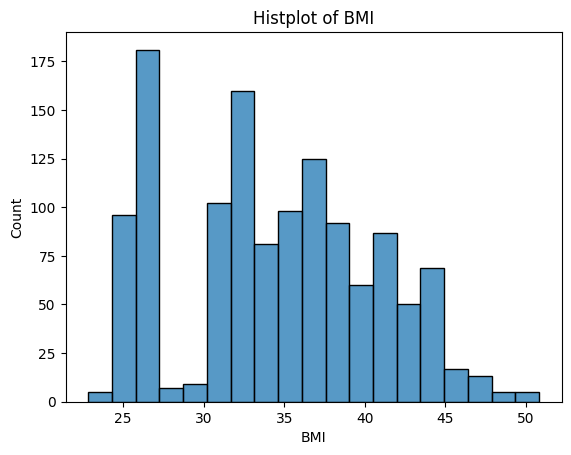

In [53]:
#수치형 데이터 시각화
for col in col_num :
    print(medical[col].describe())
    sns.histplot(medical[col])
    plt.title(f'Histplot of {col}')
    plt.show()
    print('\n');

Age 변수에서 이상치가 있음을 히스토그램을 통해 확인할 수 있다.
<br>Age 변수의 이상치는 3시그마법을 이용하여 확인한다.

In [5]:
age_mean=medical_1['Age'].mean()
age_lower=age_mean-3*medical_1['Age'].std()
age_upper=age_mean+3*medical_1['Age'].std()

medical_1.loc[(medical_1['Age']<age_lower)|(medical_1['Age']>age_upper)]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
300,918,female,150,1.532322,62,yes,yes,sometimes,3,sometimes,no,more than 2 l,no,0,3 to 5,sometimes,automobile,overweight_level_i,26.583025
467,"1,317",male,150,1.789992,98,yes,yes,sometimes,2,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,automobile,obesity_type_i,30.592879
494,"1,344",male,150,1.783906,109,yes,yes,sometimes,2,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,no,public_transportation,obesity_type_i,34.316974
528,"1,378",male,150,1.834842,105,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,automobile,obesity_type_i,31.247534
1193,"2,043",female,150,1.686033,105,yes,yes,always,3,sometimes,no,less than a liter,no,0,3 to 5,sometimes,public_transportation,obesity_type_iii,36.856473


Age 변수에서 이상치가 포함된 행은 5개로 나타났다. 이상치가 포함된 데이터의 비율이 적으므로 전체 데이터 분석에 미치는 영향이 적다고 판단하여 삭제하기로 한다
<br>이상치의 값이 모두 150으로 통일되어 있다는 점을 고려할 때, 결측치를 '150'으로 표현했을 가능성도 추론할 수 있다.

@@데이터를 변경해야 하는 경우(이상치 삭제, 결측치 처리 등등등) 꼭 copy 형식으로 데이터 보관하시길 추천드립니다 ㅠㅠㅠ 나중에 답안 수정할 때 진짜 힘들어요 

In [10]:
#Age 이상치 삭제

age_abnormal_ind=medical_1.loc[(medical_1['Age']<age_lower)|(medical_1['Age']>age_upper)].index
medical_2=medical_1.drop(index=age_abnormal_ind)
medical_2.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662


male      636
female    626
Name: Gender, dtype: int64


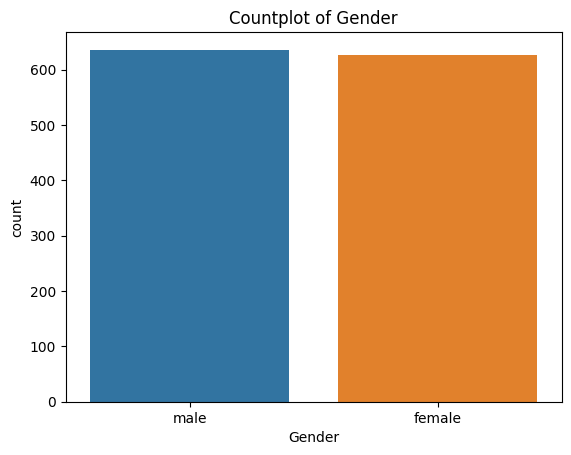



yes    1173
no       89
Name: family_history_with_overweight, dtype: int64


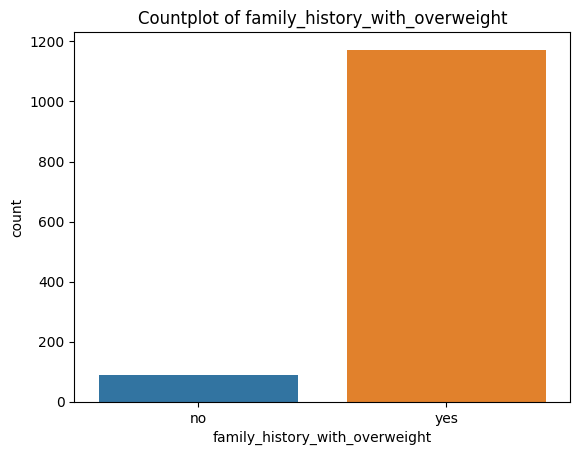



yes    1221
no       41
Name: FAVC, dtype: int64


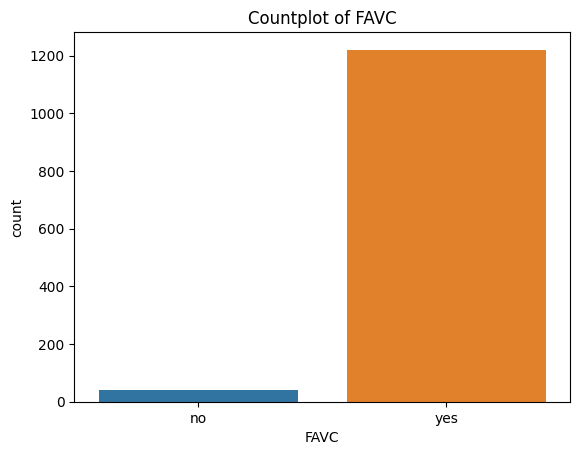



always       630
sometimes    580
never         52
Name: FCVC, dtype: int64


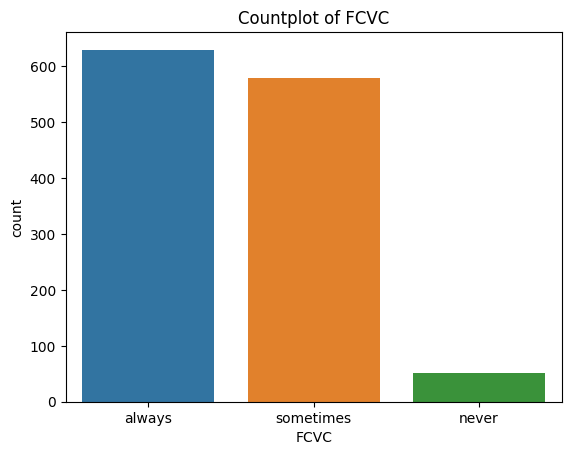



sometimes     1190
no              37
frequently      22
always          13
Name: CAEC, dtype: int64


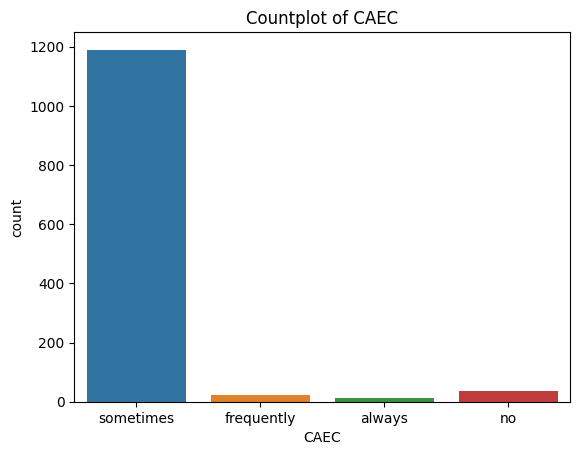



no     1237
yes      25
Name: SMOKE, dtype: int64


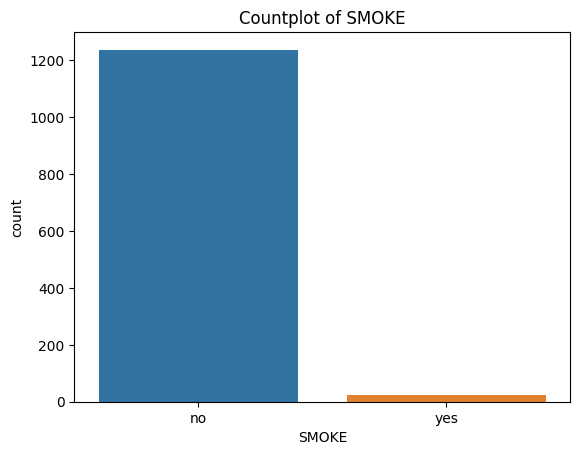



between 1 and 2 l    618
more than 2 l        373
less than a liter    271
Name: CH2O, dtype: int64


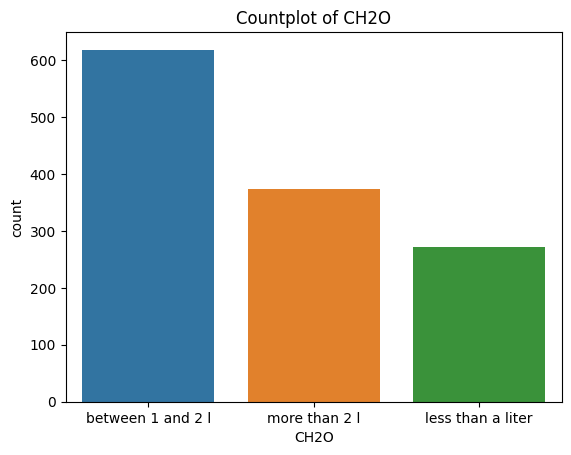



no     1219
yes      40
Name: SCC, dtype: int64


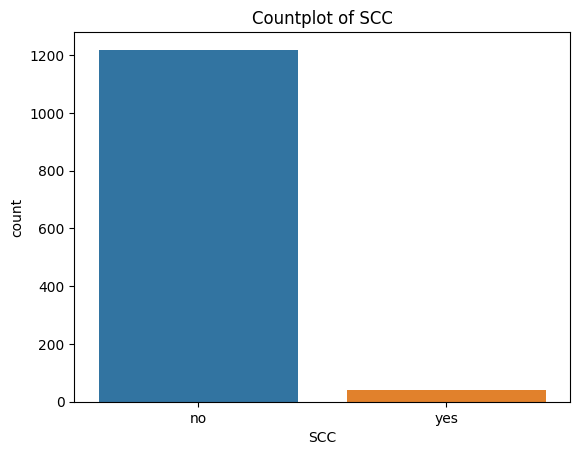



1 to 2    482
0         471
2 to 4    260
4 to 5     49
Name: FAF, dtype: int64


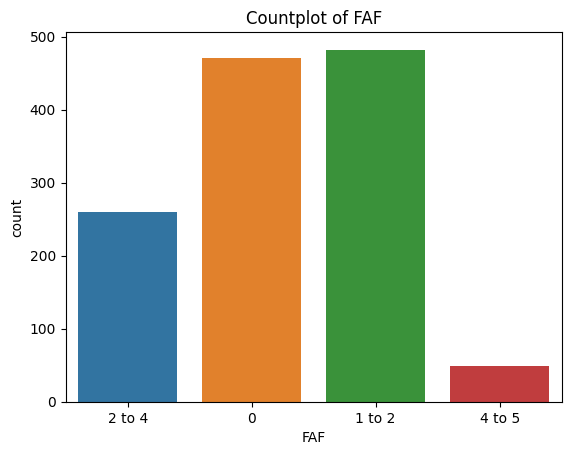



0 to 2    615
3 to 5    521
>5        126
Name: TUE, dtype: int64


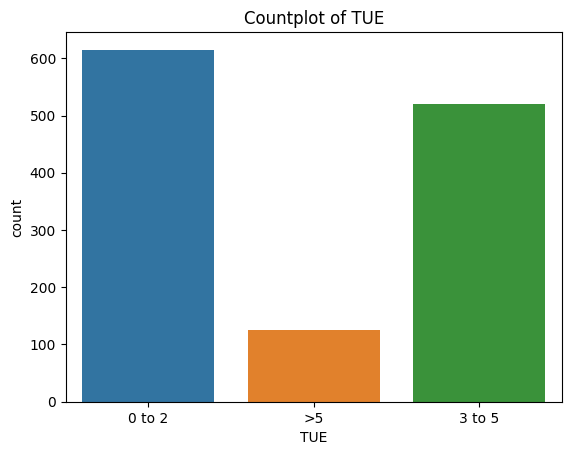



sometimes     943
no            287
frequently     32
Name: CALC, dtype: int64


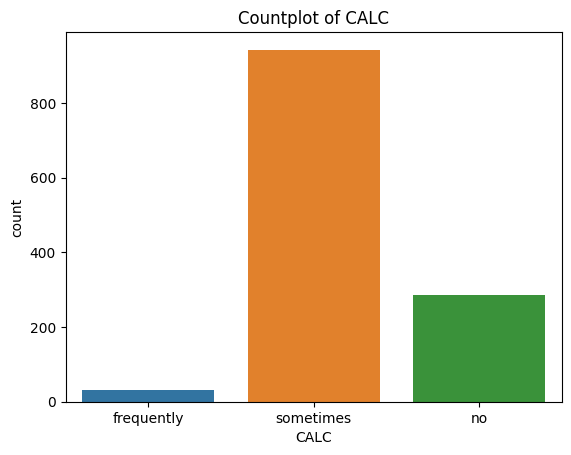



public_transportation    971
automobile               272
walking                   12
motorbike                  4
bike                       3
Name: MTRANS, dtype: int64


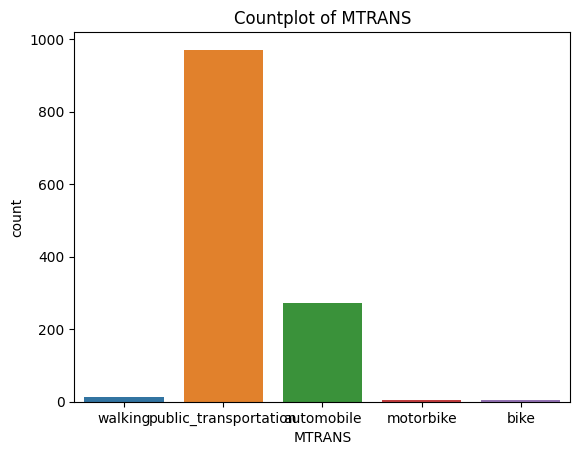



obesity_type_i        351
obesity_type_iii      324
obesity_type_ii       297
overweight_level_i    290
Name: NObeyesdad, dtype: int64


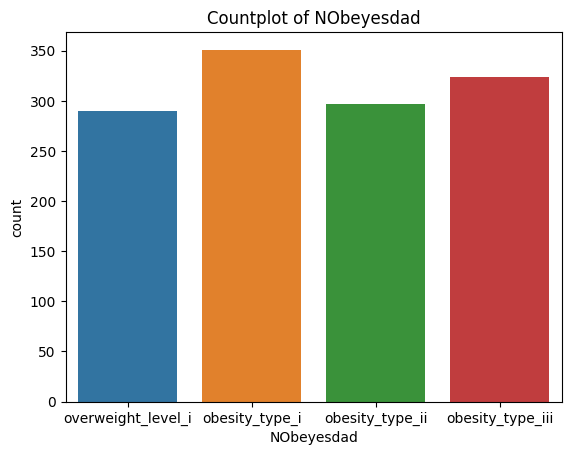

In [61]:
#명목형 변수 EDA
for col in col_obj:
    print(medical[col].value_counts())
    sns.countplot(x=medical[col])
    plt.title(f'Countplot of {col}')
    plt.show()
    print('\n');

명목형 변수는 데이터 간 불균형은 있으나 이상치나 결측치는 없음을 확인하였다.

## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

첫 번째는 레이블 인코딩이다. 범주형 변수 중 family_history_with_overweight, FAVC, NCP, CAEC, SMOKE, FAF, CALC, FCVC, CH2O, SCC, TUE은
<br>레이블 인코딩으로 변환하였을 때 값의 크기와 obesity가 상관관계가 있을 것으로 보이는 변수들이다.
<br>따라서 레이블 인코딩을 수행한 데이터를 모델 훈련에 사용한다면 모델의 성능이 향상될 수 있을 것으로 보인다.

In [21]:
columns=['family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'SMOKE', 'FAF', 'CALC', 'FCVC', 'CH2O', 'SCC', 'TUE']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
medical_3=medical_2.copy()

for col in columns:
    medical_3[col]=encoder.fit_transform(medical_2[col])

medical_3.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.80,87,0,0,0,2,3,0,0,0,2,0,0,walking,overweight_level_i,26.851852
1,11,male,26,1.85,105,1,1,0,2,1,0,2,0,2,2,2,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.80,99,0,1,2,2,3,0,0,0,2,1,0,automobile,obesity_type_i,30.555556
3,18,female,29,1.53,78,0,1,2,0,3,0,0,0,0,0,1,automobile,obesity_type_i,33.320518
4,20,female,23,1.65,70,1,0,2,0,3,0,0,0,0,0,2,public_transportation,overweight_level_i,25.711662


두 번째는 범주화이다. BMI 데이터를 EDA로 확인하였을 때 정규분포를 따르지 않았던 것을 확인할 수 있다.
<br>BMI를 구간별로 나누어 데이터를 전처리한다면 모델의 성능을 더 향상시킬 수 있을 것으로 보인다.

@@이 부분은 제가 답안을 쓴지 오래돼서 뭐라고 썼었는지 정확하게 기억이 안나는데 'BMI를 등급으로 나눈다'는 느낌이었습니다

In [57]:
medical_4=medical_3.copy()

medical_4['BMI']=np.where(medical_4['BMI']<30, 0, np.where(medical_4['BMI']<40, 1, 2))
medical_4['BMI'].value_counts().sort_index()

0    291
1    696
2    267
Name: BMI, dtype: int64

## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

본 답안에서 대상자의 physical activity level을 고려할 수 있는 파생변수를 생성하고자 한다.
<br>PAL(phyical activity level)은 값이 클수록 신체활동 수준이 높음을 나타낸다.
<br>MTRANS는 automobile 0, motorbike 1, public_transportation 2, bike 3, walking 4으로 레이블 인코딩을 수행한 후 
<br>PAL=FAF-TUE+MTRANS로 계산하여 변수를 생성한다.

@@의료계열 쪽 석사를 했어서 신체활동을 측정하는 도구를 만드는데 조금 더 익숙해서 수월하게 풀었던거 같아요
<br>물론 저렇게 만드는게 아무런 근거는 없지만 근거가 있어보이도록 답안을 작성하는 건 점수 향상에 도움이 되었던 것 같습니다!

In [66]:
medical_5=medical_4.copy()
medical_5['MTRANS']=medical_5['MTRANS'].map({'automobile' : 0, 'motorbike' : 1, 'public_transportation' : 2, 'bike' : 3, 'walking' : 4})
medical_5['PAL']=medical_5['FAF']-medical_5['TUE']+medical_5['MTRANS']

In [69]:
medical_5['PAL'].value_counts().sort_index()

-2      6
-1     45
 0    139
 1    248
 2    404
 3    305
 4     90
 5      9
 6      6
 7      2
Name: PAL, dtype: int64

모델 훈련에 직접 사용할 수 있도록 추가 전처리를 수행한다.
<br>식별자인 id 컬럼은 삭제하고 Gender는 원-핫인코딩을 수행한다. 또한 종속변수인 NObeyesdad는 라벨링 인코딩을 수행한다.

In [73]:
medical_5=medical_5.drop(columns='id')
medical_5['Gender']=medical_5['Gender'].map({'male' : 0, 'female' : 1})
medical_5['NObeyesdad']=medical_5['NObeyesdad'].map({'overweight_level_i' : 0, 'obesity_type_i' : 1, 'obesity_type_ii' : 2,
                                                     'obesity_type_iii' : 3})

## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

본 답안에서 로지스틱 회귀모델, KNN, 나이브 베이즈를 사용한다.
<br>다중 분류이므로 평가 기준은 macro F1 score로 평가하며 KFold를 사용한다. 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [75]:
X=medical_5.drop(columns='NObeyesdad')
y=medical_5['NObeyesdad']

In [79]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
models=[lr, knn, nb]

for model in models:
    scores=cross_val_score(model, X, y, scoring='f1_macro', cv=5)
    print(f'{model}의 F1 score는 {np.mean(scores)}')

LogisticRegression()의 F1 score는 0.9049114669520802
KNeighborsClassifier()의 F1 score는 0.974089593839944
GaussianNB()의 F1 score는 0.8350252787894391


macro F1 score를 기준으로 KNN의 점수가 0.97로 로지스틱 회귀모델, 나이브 베이즈보다 성능이 우수한 것을 알 수 있었다.

## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

@@흠.. 제 기억으로는 2-1에서 사용한 평가지표를 사용했던거로 기억해서 f1 macro로 수행했습니다..!

로지스틱 회귀모델에 그리드 서치를 적용하여 파라미터를 튜닝한다

In [112]:
from sklearn.model_selection import GridSearchCV
param_grid={'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='f1_macro')

In [113]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1}
0.9087782780446411


그리드서치 튜닝 결과 C=0.1일 때 F1 score 0.9로 가장 성능이 뛰어났음을 알 수 있다.

## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [115]:
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=[('lr' , lr), ('knn' , knn), ('nb' , nb)], voting='soft')

#2-1과 같은 방식으로 모델링 수행
scores_vote=cross_val_score(vote, X, y, scoring='f1_macro', cv=5)
print('soft voting 모델의 F1 score는 ', np.mean(scores_vote))

soft voting 모델의 F1 score는  0.9561012506825971


soft voting 모델의 F1 score는 약 0.96으로 2-2에서 파라미터를 수행한 로지스틱 회귀모델의 F1 score 0.9보다 더 높은 것을 알 수 있다.

## 3-2 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

@@저는 시험장에서 Drop Columns Importance라는걸 처음 들었어요.. 그래서 그냥 permutation importance로 답안 작성해서 제출했는데 아마 이 부분은 다 감점을 받았을 거 같아요

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라
 
> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [142]:
bmi= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
bmi

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성
...,...,...,...,...,...,...,...,...,...,...,...
6796,ID_6443,156.04,55.36,20030429,2020_04_23,1,4,1,7.8,9.3,여성
6797,ID_3606,182.46,67.55,20050528,2022_08_03,1,4,0,2.9,8.9,남성
6798,ID_5704,150.18,48.29,20030420,2020_02_29,0,1,1,6.0,7.8,여성
6799,ID_6637,159.45,60.53,20000718,2016_12_11,0,1,1,7.6,5.4,여성


In [143]:
#날짜데이터 전처리

bmi['생년월일']=pd.to_datetime(bmi['생년월일'], format='%Y%m%d')
bmi['건강검진일']=pd.to_datetime(bmi['건강검진일'], format='%Y_%m_%d')

bmi.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,1997-07-25,2014-11-20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,2002-09-21,2020-01-28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,1998-07-08,2015-03-03,0,4,1,0.3,8.5,여성


In [153]:
#만나이 변수 생성
bmi['만나이']=((bmi['건강검진일']-bmi['생년월일'])/365).dt.days
bmi['만나이'].value_counts()

17    3686
16    3115
Name: 만나이, dtype: int64

In [155]:
#BMI 변수 생성
bmi['BMI']=bmi['weight']/((bmi['키']/100)**2)

In [167]:
def calculate_normal_weight(row):
    if row['만나이'] == 17:
        if row['성별'] == '남성' and 21.03 <= row['BMI'] < 23.21:
            return '정상'
        elif row['성별'] == '여성' and 20.03 <= row['BMI'] < 22.39:
            return '정상'
    elif row['만나이'] == 16:
        if row['성별'] == '남성' and 21.18 <= row['BMI'] < 23.45:
            return '정상'
        elif row['성별'] == '여성' and 19.61 <= row['BMI'] < 21.74:
            return '정상'
    
    return '비정상'

# '정상체중' 열 추가
bmi['정상체중'] = bmi.apply(calculate_normal_weight, axis=1)

## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

명목형 변수인 공학여부, 아침식사여부, 성별은 카이제곱 독립성 검정을 사용한다.

In [177]:
def create_crosstab(col):
    df=pd.crosstab(bmi[col], bmi['정상체중'])
    return df

In [194]:
from scipy.stats import chi2_contingency

def chi(df):
    chi2, p, _, _ = chi2_contingency(df)
    print('P-value는 ', np.round(p, 2))
    if p<0.05 :
        result='이 변수는 적정 체중 여부와 독립적이지 않습니다'

    else:
        result='이 변수는 적정 체중 여부와 독립적입니다'
        
    return result

In [295]:
columns=['공학여부', '아침식사여부', '성별']

for col in columns:
    df=create_crosstab(col)
    print(col)
    print(chi(df))
    print('\n')

공학여부
P-value는  0.03
이 변수는 적정 체중 여부와 독립적이지 않습니다


아침식사여부
P-value는  0.7
이 변수는 적정 체중 여부와 독립적입니다


성별
P-value는  0.96
이 변수는 적정 체중 여부와 독립적입니다




연속형 변수인 '일주일운동시간', '채소섭취정도', '수면시간'은 정상체중/비정상체중군 간 평균의 차이를 검정한다.
<br>검정수행시 각 그룹의 규모가 충분히 크므로 정규분포를 사용한다.

In [297]:
bmi_normal=bmi.loc[bmi['정상체중']=='정상']
bmi_abnormal=bmi.loc[bmi['정상체중']!='정상']

In [318]:
from scipy.stats import norm

def difference(col, bmi_normal, bmi_abnormal):
    z_alpha=norm.ppf(1-0.05/2)
    
    normal_mean=np.mean(bmi_normal[col])
    abnormal_mean=np.mean(bmi_abnormal[col])
    
    normal_n=bmi_normal.shape[0]
    abnormal_n=bmi_abnormal.shape[0]
    
    normal_std=bmi_normal[col].std(ddof=0)
    abnormal_std=bmi_abnormal[col].std(ddof=0)
    
    z_value = (normal_mean - abnormal_mean) / np.sqrt((normal_std**2) / normal_n + (abnormal_std**2) / abnormal_n)
    
    if z_value>z_alpha:
        result='이 변수는 적정 체중 여부와 독립적이지 않습니다'
    else:
        result='이 변수는 적정 체중 여부와 독립적입니다'
        
    return result

In [321]:
columns_numeric=['일주일운동시간','채소섭취정도','수면시간']

for col in columns_numeric:
    print(col)
    print(difference(col, bmi_normal, bmi_abnormal))
    print('\n')

일주일운동시간
이 변수는 적정 체중 여부와 독립적입니다


채소섭취정도
이 변수는 적정 체중 여부와 독립적입니다


수면시간
이 변수는 적정 체중 여부와 독립적이지 않습니다




따라서 공학여부, 수면시간을 모델링에 사용한다.

## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [324]:
#유의한 변수였던 공학여부와 채소섭취정도를 포함
bmi_final=bmi[['공학여부', '수면시간', '정상체중']]
X=bmi_final[['공학여부', '수면시간']]
y=bmi_final['정상체중'].map({'정상' : 0 , '비정상' : 1})

In [325]:
#로지스틱 회귀분석

import statsmodels.api as sm

model=sm.Logit(y, X)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.677079
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   정상체중   No. Observations:                 6801
Model:                          Logit   Df Residuals:                     6799
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                0.001197
Time:                        14:49:35   Log-Likelihood:                -4604.8
converged:                       True   LL-Null:                       -4610.3
Covariance Type:            nonrobust   LLR p-value:                 0.0008943
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
공학여부          -0.1064      0.048     -2.203      0.028      -0.201      -0.012
수면시간          -0.0402      0.005     -8.932      0.000      -0.049      -0.031
==============================================================================
"""

In [326]:
print('공학여부의 오즈비는 ',np.exp(result.params[0]))
print('수면시간의 오즈비는 ', np.exp(result.params[1]))

공학여부의 오즈비는  0.8990791136740519
수면시간의 오즈비는  0.9606017254856177


In [327]:
#XGB 모델 생성

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [328]:
importances=xgb.feature_importances_
importance=pd.DataFrame(importances, columns=['XGBoost에서 feature 중요도']) 
importance.index=['공학여부', '수면시간']

importance

,XGBoost에서 feature 중요도
공학여부,0.361862
수면시간,0.638138


## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

In [329]:
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y, result.predict(X))
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y, xgb.predict_proba(X)[:,1])

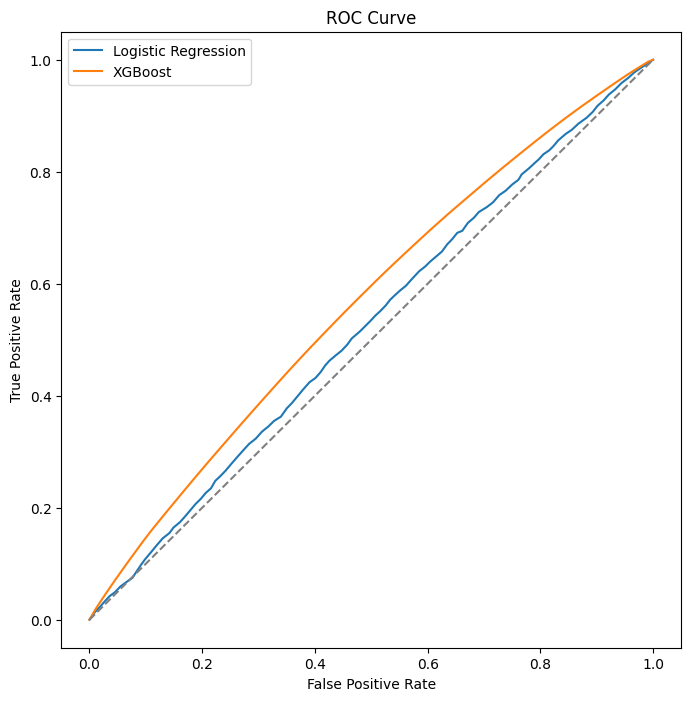

In [330]:
plt.figure(figsize=(8, 8))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 통계 (40점)

## 5. 평균이 $\theta$이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)
무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 제품의 무게가 120kg일 때, 사후분포의 평균을 구하라

@@이 문제가 31회 기출이 맞나요??

In [371]:
prior_mean = 100
prior_var = 256

x = 120
target_var = 100

# 사후분포의 평균 및 분산 계산
posterior_mean = (prior_var * x + target_var * prior_mean) / (prior_var + target_var)
variance_posterior = (prior_var * target_var) / (prior_var + target_var)

print(f"사후분포의 평균: {posterior_mean}")

사후분포의 평균: 114.38202247191012


## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

In [2]:
import pandas as pd
sales = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [3]:
#회귀 모델링

from statsmodels.formula.api import ols

linear=ols('Sales~TV+Radio+Newspaper', data=sales).fit()
linear.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           8.13e-99
Time:                        16:42:35   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Newspaper의 P-value는 0.05보다 훨씬 크기 때문에 유의하지 않다.

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

@@'데싸라면' 책을 들고 갔었는데 여기에서 후진제거법 있는 코드를 그대로 시험 답안 작성하는데 활용했었습니다!

In [4]:
X=['TV', 'Radio', 'Newspaper']
y='Sales'

In [5]:
import statsmodels.formula.api as smf

model_no_news=smf.ols(formula='Sales~TV+Radio', data=sales)
regr_no_news=model_no_news.fit()
AIC_no_news=regr_no_news.aic

model_no_TV=smf.ols(formula='Sales~Newspaper+Radio', data=sales)
regr_no_TV=model_no_TV.fit()
AIC_no_TV=regr_no_TV.aic

model_no_radio=smf.ols(formula='Sales~TV+Newspaper', data=sales)
regr_no_radio=model_no_radio.fit()
AIC_no_radio=regr_no_radio.aic

In [6]:
result=pd.DataFrame([AIC_no_news, AIC_no_TV, AIC_no_radio], columns=['AIC'])
result.index=['No_News', 'No_TV', 'No_Radio']

result                    

,AIC
No_News,772.673605
No_TV,1212.057123
No_Radio,891.390333


News가 제거되었을 때 AIC의 점수가 가장 낮으므로 News를 제거한다.

## 6-3 VIF를 통한 다중공선성 진단

In [7]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X=dmatrices('Sales~TV+Radio+Newspaper', data=sales, return_type='dataframe')
vif_list=[]

for i in range(1,len(X.columns)):
    vif_list.append(variance_inflation_factor(X.values, i))

vif_result=pd.DataFrame(vif_list, columns=['VIF'])
vif_result.index=X.columns[1:]

vif_result

,VIF
TV,1.004611
Radio,1.144952
Newspaper,1.145187


VIF는 10 이상일 때 다중공선성이 있다고 진단한다. 
<br>그러나 위 결과에서 모든 독립변수의 VIF가 10이하이므로 다중공선성은 발견되지 않았다고 할 수 있다.

## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

@@이 부분은 코크란 검정을 파이썬으로 구현할 줄 몰라서 아예 틀렸었습니다 ㅜㅜ 나중에 더 공부하면서 찾은 내용 기반으로 작성했어요
<br>그리고 비모수검정과 모수검정을 하나하나 대응시켜서 시험 준비하는 것도 도움이 많이 될 거 같아요
<br>독립 표본 T 검정 - 맨위트니 이런식으로 분산 분석까지!

In [8]:
contract=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')
contract=contract.drop(columns='Unnamed: 0')

In [11]:
H0='영업사원의 평균 계약 성사 건수는 같다'
H1='영업사원의 평균 계약 성사 건수는 같지 않다'

from statsmodels.stats.contingency_tables import cochrans_q
pvalue=cochrans_q(contract).pvalue
alpha=0.05

print('P-value는 ', np.round(pvalue,3))
if pvalue<alpha:
    print('귀무가설을 기각한다. 따라서 영업사원의 평균 계약 성사 건수는 같지 않다')
else:
    print('귀무가설을 채택한다. 따라서 영업사원의 평균 계약 성사 건수는 같다.')

P-value는  0.341
귀무가설을 채택한다. 따라서 영업사원의 평균 계약 성사 건수는 같다.


## 8 유기견이 하루에 2.2마리 발생한다 (10점)

## 8-1 한 마리도 안 버려질 확률

In [13]:
from scipy.stats import poisson

# 발생하는 유기견의 평균 수
lambda_dog = 2.2

# 1마리도 발생하지 않을 확률 계산

probability_zero_dogs = poisson.pmf(0, lambda_dog)

print('한 마리도 버려지지 않을 확률은 ', np.round(probability_zero_dogs,2))

한 마리도 버려지지 않을 확률은  0.11


## 8-2 적어도 2마리 버려질 확률

In [14]:
#1마리까지 버려질 확률의 누적확률을 구한 후 전체 확률에서 빼기

probability_at_least_2_dogs = 1 - poisson.cdf(1, lambda_dog)
print('적어도 두 마리가 버려질 확률은 ', np.round(probability_at_least_2_dogs,2))

적어도 두 마리가 버려질 확률은  0.65
